# NLP Project

# Imports

In [1]:
from transformers import pipeline
import torch
import pandas as pd
from transformers import XLMRobertaTokenizer, DataCollatorForLanguageModeling, Trainer, TrainingArguments
from datasets import Dataset

# Data Preprocessing

In [2]:
# import time
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.common.exceptions import TimeoutException, NoSuchElementException, ElementClickInterceptedException
# from webdriver_manager.chrome import ChromeDriverManager
# import pandas as pd
# from urllib.parse import urlparse

# def extract_label_from_url(url):
#     parsed_url = urlparse(url)
#     path = parsed_url.path
#     label = path.split('/')[-2]  # Use the second-to-last part of the path
#     return label

# def scrape_headlines_selenium(url, num_headlines=5000):
#     chrome_options = Options()
#     chrome_options.add_argument("--headless")
#     service = Service(ChromeDriverManager().install())
#     driver = webdriver.Chrome(service=service, options=chrome_options)

#     try:
#         driver.get(url)
#         print(f"Page title: {driver.title}")

#         headlines = []
#         load_more_attempts = 0
#         max_load_more_attempts = 10  # Adjust this value if needed

#         while len(headlines) < num_headlines and load_more_attempts < max_load_more_attempts:
#             # Wait for articles to load
#             WebDriverWait(driver, 10).until(
#                 EC.presence_of_element_located((By.XPATH, "//div[contains(@class, 'td-block-span6')]"))
#             )

#             # Find all article elements
#             articles = driver.find_elements(By.XPATH, "//div[contains(@class, 'td-block-span6')]")

#             # Extract headlines from new articles
#             for article in articles[len(headlines):]:
#                 try:
#                     headline_element = article.find_element(By.XPATH, ".//div[contains(@class, 'td-module-thumb')]/a")
#                     headline = headline_element.get_attribute('title').strip()
#                     if headline not in headlines:
#                         headlines.append(headline)
#                         # print(f"Found headline: {headline}")
#                 except Exception as e:
#                     print(f"Error extracting headline: {e}")

#             print(f"Total headlines found: {len(headlines)}")

#             if len(headlines) >= num_headlines:
#                 break

#             # Try to click 'Load more' button
#             load_more_clicked = False
#             try:
#                 # Scroll to the bottom of the page
#                 driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#                 time.sleep(2)  # Wait for any lazy-loaded content

#                 # Try to find the 'Load more' button
#                 load_more_button = WebDriverWait(driver, 5).until(
#                     EC.element_to_be_clickable((By.ID, "load_more_articles_button"))
#                 )
#                 driver.execute_script("arguments[0].scrollIntoView({block: 'center'});", load_more_button)
#                 time.sleep(1)  # Short pause after scrolling
#                 load_more_button.click()
#                 print("Clicked 'Load more' button")
#                 load_more_clicked = True
#                 time.sleep(3)  # Wait for new content to load
#             except (TimeoutException, NoSuchElementException, ElementClickInterceptedException) as e:
#                 print(f"Could not click 'Load more' button: {e}")
                
#                 # Try alternative method using JavaScript click
#                 try:
#                     driver.execute_script("document.getElementById('load_more_articles_button').click();")
#                     print("Clicked 'Load more' button using JavaScript")
#                     load_more_clicked = True
#                     time.sleep(3)  # Wait for new content to load
#                 except Exception as js_e:
#                     print(f"Could not click 'Load more' button using JavaScript: {js_e}")

#             if not load_more_clicked:
#                 load_more_attempts += 1
#                 print(f"Load more attempt {load_more_attempts} failed")
#             else:
#                 load_more_attempts = 0  # Reset the counter if we successfully loaded more

#         if load_more_attempts >= max_load_more_attempts:
#             print("Reached maximum 'Load more' attempts. Ending search.")

#         return headlines[:num_headlines]

#     finally:
#         driver.quit()

# # URL of the webpage
# url = 'https://www.isolezwelesixhosa.co.za/ezemidlalo/'

# print("Attempting to scrape with Selenium:")
# headlines = scrape_headlines_selenium(url)

# # Extract label from URL
# label = extract_label_from_url(url)

# # Create DataFrame with headlines and label
# df = pd.DataFrame({
#     'headlines': headlines,
#     'label': [label] * len(headlines)
# })

# # Save the headlines to a CSV file
# df.to_csv('headlines.csv', index=False)

# print(f"\n{len(headlines)} Headlines saved to headlines.csv")
# print(f"Label used: {label}")

# # Print the first few headlines for verification
# print("\nFirst few headlines:")
# for headline in headlines[:5]:
#     print(f"{headline} (Label: {label})")

# # Print the last few headlines for verification
# print("\nLast few headlines:")
# for headline in headlines[-5:]:
#     print(f"{headline} (Label: {label})")

In [3]:
# # URL of the webpage
# url = 'https://www.isolezwelesixhosa.co.za/iindaba/'

# print("Attempting to scrape with Selenium:")
# headlines = scrape_headlines_selenium(url)

# # Extract label from URL
# label = extract_label_from_url(url)

# # Create DataFrame with headlines and label
# df = pd.DataFrame({
#     'headlines': headlines,
#     'label': [label] * len(headlines)
# })

# # Save the headlines to a CSV file
# df.to_csv('more_headlines.csv', index=False)

# print(f"\n{len(headlines)} Headlines saved to more_headlines.csv")
# print(f"Label used: {label}")

# # Print the first few headlines for verification
# print("\nFirst few headlines:")
# for headline in headlines[:5]:
#     print(f"{headline} (Label: {label})")

# # Print the last few headlines for verification
# print("\nLast few headlines:")
# for headline in headlines[-5:]:
#     print(f"{headline} (Label: {label})")

In [4]:
data1 = pd.read_csv("headlines.csv")
data2 = pd.read_csv("more_headlines.csv")

df = pd.concat([data1, data2], ignore_index=True)
df.dropna(inplace=True)
df.to_csv("xhosa headlines dataset.csv")


import re
import pandas as pd

# Function to remove punctuation from a single string
def remove_punctuation(text):
    # Check if the input is a string, otherwise return it unchanged
    if isinstance(text, str):
        pattern = r'[^\w\s]'  # Regex pattern to match any punctuation
        return re.sub(pattern, '', text)


# Apply the remove_punctuation function to the 'headlines' column
df['headlines'] = df['headlines'].apply(remove_punctuation)

# Display the updated DataFrame
print(df)

                                              headlines       label
0     ABafana Bafana bayingombe yanaba iCongo Brazza...  ezemidlalo
1     UMali noMaliwa bavul amehlo ulutsha ngamathuba...  ezemidlalo
2     UThapelo Morena uthi kufuneka bavale amazibuko...  ezemidlalo
3     Sicela yonke iMpuma Koloni ixhase aBafana Bafa...  ezemidlalo
4     UHugo Broos uthi mabatshintshe igiya aBafana B...  ezemidlalo
...                                                 ...         ...
9995            UPhaphama usifun apha isithsaba sobuhle     iindaba
9996              Yidrama yodwa kumdlalo weqonga eBhayi     iindaba
9997    Zidilikile izindlu zizandyondyo zemvula eTylden     iindaba
9998                   Iminyaka eli18 engaphumi endlini     iindaba
9999  Listeriosis Indawo yepoloni noonkqiyoyo iyabon...     iindaba

[9999 rows x 2 columns]


In [5]:
from sklearn.model_selection import train_test_split

# Step 1: Split 85% for train + test and 15% for validation
train_test_df, val_df = train_test_split(df, test_size=0.15, random_state=42)

# Step 2: Split train_test_df into 70% training and 15% testing (equivalent to 85% * 70/85 for training)
train_df, test_df = train_test_split(train_test_df, test_size=0.1765, random_state=42)  # 0.1765 ≈ 15 / 85

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6998 entries, 1855 to 4498
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  6998 non-null   object
 1   label      6998 non-null   object
dtypes: object(2)
memory usage: 164.0+ KB


In [7]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 5345 to 3296
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  1500 non-null   object
 1   label      1500 non-null   object
dtypes: object(2)
memory usage: 35.2+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1501 entries, 6610 to 6652
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  1501 non-null   object
 1   label      1501 non-null   object
dtypes: object(2)
memory usage: 35.2+ KB


In [9]:
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)
val_df.to_csv("val_data.csv", index=False)

In [10]:
import re

# Function to remove punctuation from a single string
def remove_punctuation(text):
    # Check if the input is a string, otherwise return it unchanged
    if isinstance(text, str):
        pattern = r'[^\w\s]'  # Regex pattern to match any punctuation
        return re.sub(pattern, '', text)

# Function to remove punctuation from a text file
def remove_punctuation_from_file(file_path):
    try:
        # Open the file with UTF-8 encoding and read its contents
        with open(file_path, 'r', encoding='utf-8') as file:
            text = file.read()

        # Remove punctuation from the entire text
        clean_text = remove_punctuation(text)

        # Save the clean text back to a file (you can overwrite the original file or save to a new file)
        with open('cleaned_' + file_path, 'w', encoding='utf-8') as clean_file:
            clean_file.write(clean_text)
    except UnicodeDecodeError:
        print(f"Error: Unable to read the file {file_path} due to encoding issues.")

# Example usage
file_path = 'xhosa constitution.txt'  # Replace with your text file path
remove_punctuation_from_file(file_path)


# Language Model

In [11]:
# Step 1: Check GPU availability
print(torch.cuda.is_available())  # Should return True if the GPU is accessible
if torch.cuda.is_available():
    device = torch.device("cuda")  # Use the GPU if available
    print(torch.cuda.get_device_name(0))  # Should print the GPU name
else:
    device = torch.device("cpu")  # Use CPU if no GPU is available

model_name = 'FacebookAI/xlm-roberta-base'


True
NVIDIA RTX A1000 6GB Laptop GPU


# General Task Fine Tuning

In [12]:
import torch
from transformers import AutoTokenizer, AutoModelForMaskedLM, AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import load_dataset
from sklearn.preprocessing import LabelEncoder

# ======== Step 1: Pretraining on Unlabelled Data (Masked Language Model - MLM) ========

# Load the XLM-RoBERTa tokenizer and model for MLM
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_mlm = AutoModelForMaskedLM.from_pretrained(model_name)
model_mlm = model_mlm.to(device)

# Load unlabelled dataset (general text data for pretraining, e.g., headlines or articles)
unlabeled_dataset = load_dataset('text', data_files={'train': 'cleaned_xhosa constitution.txt'})  # Replace with your unlabelled data

# Tokenize the unlabelled dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], return_special_tokens_mask=True, truncation=True, padding='max_length')

tokenized_unlabeled_dataset = unlabeled_dataset.map(tokenize_function, batched=True, remove_columns=['text'])

# Create a data collator for MLM
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=True,
    mlm_probability=0.15  # Mask 15% of tokens
)

# Pretraining arguments
pretraining_args = TrainingArguments(
    output_dir='./pretrained_xlm_roberta',
    overwrite_output_dir=True,
    num_train_epochs=5,
    per_device_train_batch_size=2,  # Reduced batch size
    gradient_accumulation_steps=4,  # Gradient accumulation
    fp16=True,
    save_steps=10_000,
    save_total_limit=2,
)

# Initialize Trainer for MLM pretraining
trainer_mlm = Trainer(
    model=model_mlm,
    args=pretraining_args,
    data_collator=data_collator,
    train_dataset=tokenized_unlabeled_dataset['train']
)

# Pretrain the model
trainer_mlm.train()

# Save the pretrained MLM model
model_mlm.save_pretrained('./pretrained_xlm_roberta')
tokenizer.save_pretrained('./pretrained_xlm_roberta')

C:\Users\mdhla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of the model checkpoint at FacebookAI/xlm-roberta-base were not used when initializing XLMRobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForMaskedLM from the checkpoin

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/2161 [00:00<?, ? examples/s]

C:\Users\mdhla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\accelerate\accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


  0%|          | 0/1350 [00:00<?, ?it/s]

{'loss': 3.2127, 'grad_norm': 35.213626861572266, 'learning_rate': 3.174074074074074e-05, 'epoch': 1.85}
{'loss': 2.304, 'grad_norm': 20.208040237426758, 'learning_rate': 1.3222222222222221e-05, 'epoch': 3.7}
{'train_runtime': 19695.9003, 'train_samples_per_second': 0.549, 'train_steps_per_second': 0.069, 'train_loss': 2.5441018337673613, 'epoch': 5.0}


('./pretrained_xlm_roberta\\tokenizer_config.json',
 './pretrained_xlm_roberta\\special_tokens_map.json',
 './pretrained_xlm_roberta\\sentencepiece.bpe.model',
 './pretrained_xlm_roberta\\added_tokens.json',
 './pretrained_xlm_roberta\\tokenizer.json')

# Specific Task Fine Tuning

In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
from sklearn.preprocessing import LabelEncoder

# Load the pretrained tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('./pretrained_xlm_roberta')
model_classifier = AutoModelForSequenceClassification.from_pretrained('./pretrained_xlm_roberta', num_labels=2)

# Load the dataset
dataset = load_dataset('csv', data_files={'train': 'train_data.csv', 'val': 'val_data.csv'})

# Encode the labels
label_encoder = LabelEncoder()
label_encoder.fit(['iindaba', 'ezemidlalo'])  # Adjust these labels if needed

def encode_labels(examples):
    examples['labels'] = label_encoder.transform(examples['label'])
    return examples

# Apply label encoding to the dataset
dataset = dataset.map(encode_labels, batched=True)

def tokenize_classification(examples):
    # Ensure 'headlines' is a list of strings
    headlines = examples['headlines']
    if isinstance(headlines, str):
        headlines = [headlines]
    
    # Tokenize the headlines
    tokenized = tokenizer(
        headlines,
        padding="max_length",
        truncation=True,
        max_length=512  # Adjust this value if needed
    )
    
    return tokenized

# Apply the tokenizer function to the dataset
tokenized_labeled_dataset = dataset.map(
    tokenize_classification,
    batched=True,
    remove_columns=['headlines', 'label']
)

# Fine-tuning arguments
fine_tuning_args = TrainingArguments(
    output_dir='./finetuned_xlm_roberta',
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=4,  # Gradient accumulation
    fp16=True,
    num_train_epochs=5,
    weight_decay=0.01,
)

# Initialize Trainer for fine-tuning
trainer_classifier = Trainer(
    model=model_classifier,
    args=fine_tuning_args,
    train_dataset=tokenized_labeled_dataset['train'],
    eval_dataset=tokenized_labeled_dataset['val'],
)

# Fine-tune the model
trainer_classifier.train()

# Save the fine-tuned classifier model
model_classifier.save_pretrained('./finetuned_xlm_roberta')
tokenizer.save_pretrained('./finetuned_xlm_roberta')

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at ./pretrained_xlm_roberta and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Generating train split: 0 examples [00:00, ? examples/s]

Generating val split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/6998 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Map:   0%|          | 0/6998 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

C:\Users\mdhla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\accelerate\accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


  0%|          | 0/2185 [00:00<?, ?it/s]

  0%|          | 0/375 [00:00<?, ?it/s]

{'eval_loss': 0.3529895842075348, 'eval_runtime': 81.558, 'eval_samples_per_second': 18.392, 'eval_steps_per_second': 4.598, 'epoch': 1.0}
{'loss': 0.4435, 'grad_norm': 21.832338333129883, 'learning_rate': 1.545080091533181e-05, 'epoch': 1.14}


  0%|          | 0/375 [00:00<?, ?it/s]

{'eval_loss': 0.49310922622680664, 'eval_runtime': 116.7211, 'eval_samples_per_second': 12.851, 'eval_steps_per_second': 3.213, 'epoch': 2.0}
{'loss': 0.2738, 'grad_norm': 4.517549514770508, 'learning_rate': 1.088329519450801e-05, 'epoch': 2.29}


  0%|          | 0/375 [00:00<?, ?it/s]

{'eval_loss': 0.45737871527671814, 'eval_runtime': 126.1092, 'eval_samples_per_second': 11.894, 'eval_steps_per_second': 2.974, 'epoch': 3.0}
{'loss': 0.1973, 'grad_norm': 14.402580261230469, 'learning_rate': 6.31578947368421e-06, 'epoch': 3.43}


  0%|          | 0/375 [00:00<?, ?it/s]

{'eval_loss': 0.3901759386062622, 'eval_runtime': 111.9039, 'eval_samples_per_second': 13.404, 'eval_steps_per_second': 3.351, 'epoch': 4.0}
{'loss': 0.1543, 'grad_norm': 106.21797943115234, 'learning_rate': 1.7391304347826088e-06, 'epoch': 4.57}


  0%|          | 0/375 [00:00<?, ?it/s]

{'eval_loss': 0.40372052788734436, 'eval_runtime': 119.822, 'eval_samples_per_second': 12.519, 'eval_steps_per_second': 3.13, 'epoch': 4.99}
{'train_runtime': 50062.9952, 'train_samples_per_second': 0.699, 'train_steps_per_second': 0.044, 'train_loss': 0.255874524673008, 'epoch': 4.99}


('./finetuned_xlm_roberta\\tokenizer_config.json',
 './finetuned_xlm_roberta\\special_tokens_map.json',
 './finetuned_xlm_roberta\\sentencepiece.bpe.model',
 './finetuned_xlm_roberta\\added_tokens.json',
 './finetuned_xlm_roberta\\tokenizer.json')

In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import load_dataset
from sklearn.manifold import TSNE
import torch
import numpy as np
import pandas as pd
import plotly.express as px
from torch.utils.data import DataLoader
from sklearn.preprocessing import LabelEncoder

# Load the fine-tuned model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('./finetuned_xlm_roberta')
model_classifier = AutoModelForSequenceClassification.from_pretrained('./finetuned_xlm_roberta')

# Load the validation dataset
dataset = load_dataset('csv', data_files={'val': 'val_data.csv'})

label_encoder = LabelEncoder()
label_encoder.fit(['iindaba', 'ezemidlalo'])  # Adjust these labels if needed

# Encode the labels correctly
def encode_labels(examples):
    examples['labels'] = label_encoder.transform(examples['label'])  # Ensure 'label' is transformed into numeric form
    return examples

# Apply encoding to the dataset
dataset = dataset.map(encode_labels, batched=True)

# Tokenize the input dataset
def tokenize_classification(examples):
    return tokenizer(
        examples['headlines'],
        padding="max_length",
        truncation=True,
        max_length=512,
        return_tensors='pt'  # Return PyTorch tensors
    )

# Apply tokenization to the validation set
tokenized_dataset = dataset['val'].map(tokenize_classification, batched=True)

# Convert to PyTorch tensors
tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Define a DataLoader for batching
batch_size = 16  # Adjust this based on your memory capacity
dataloader = DataLoader(tokenized_dataset, batch_size=batch_size)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_classifier.to(device)

# Function to extract hidden states from the model
def extract_hidden_states(model, dataloader):
    model.eval()  # Set the model in evaluation mode
    hidden_states = []
    tokens = []  # Store the tokens (subwords)
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            
            # Get the model's output with hidden states
            outputs = model(input_ids, attention_mask=attention_mask, output_hidden_states=True)
            
            # Extract the last hidden layer
            last_hidden_state = outputs.hidden_states[-1]
            
            # Mean pooling across the sequence length (dim=1)
            pooled_hidden_state = last_hidden_state.mean(dim=1)
            
            hidden_states.append(pooled_hidden_state.cpu().numpy())
            
            # Extract tokens for each input
            for batch_input_ids in input_ids:
                tokens.append([tokenizer.decode(token_id) for token_id in batch_input_ids if token_id not in tokenizer.all_special_ids])

    return np.vstack(hidden_states), tokens  # Return hidden states and tokens

# Extract hidden states and tokens for the validation set
hidden_states, tokens = extract_hidden_states(model_classifier, dataloader)

# Apply t-SNE to reduce dimensionality to 2 components
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)  # Adjust perplexity and n_iter if needed
tsne_result = tsne.fit_transform(hidden_states)

# Extract true labels from the validation dataset (make sure labels are numeric)
true_labels_tensor = torch.tensor(tokenized_dataset['labels'])
true_labels = true_labels_tensor.numpy()

# Prepare the token data for the plot
# Flatten the list of tokens so that each token corresponds to a t-SNE point
flat_tokens = [token for token_list in tokens for token in token_list]
flat_tsne_result = np.repeat(tsne_result, [len(token_list) for token_list in tokens], axis=0)
flat_labels = np.repeat(true_labels, [len(token_list) for token_list in tokens])

# Create a DataFrame with t-SNE results and token information
df_tsne = pd.DataFrame(flat_tsne_result, columns=['TSNE Component 1', 'TSNE Component 2'])
df_tsne['Label'] = flat_labels
df_tsne['Token'] = flat_tokens

# Create an interactive t-SNE plot using Plotly
fig = px.scatter(df_tsne, x='TSNE Component 1', y='TSNE Component 2',
                 color='Label',
                 hover_name='Token',  # Show token as hover information
                 title="t-SNE of Hidden States from XLM-RoBERTa (Tokens)",
                 labels={'Label': 'Class'},
                 color_continuous_scale='Viridis')

# Show the figure
fig.show()


Generating val split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

C:\Users\mdhla\AppData\Local\Temp\ipykernel_36580\255736300.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  true_labels_tensor = torch.tensor(tokenized_dataset['labels'])


# Model Predictions and Evaluation

Map:   0%|          | 0/1501 [00:00<?, ? examples/s]

C:\Users\mdhla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\accelerate\accelerator.py:494: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



  0%|          | 0/188 [00:00<?, ?it/s]

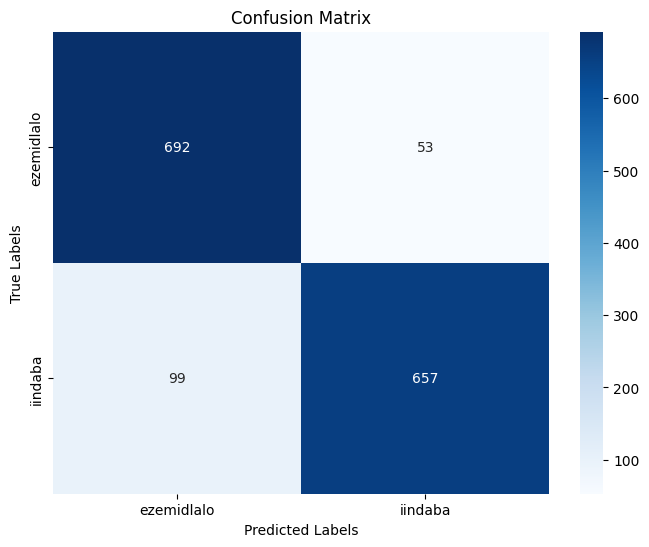

In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer
from datasets import load_dataset
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the pretrained tokenizer and fine-tuned model
tokenizer = AutoTokenizer.from_pretrained('./finetuned_xlm_roberta')
model_classifier = AutoModelForSequenceClassification.from_pretrained('./finetuned_xlm_roberta')

# Load the test dataset
test_dataset = load_dataset('csv', data_files={'test': 'test_data.csv'})['test']

# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(['iindaba', 'ezemidlalo'])  # Modify labels according to your dataset

def encode_labels(examples):
    examples['labels'] = label_encoder.transform(examples['label'])
    return examples

# Apply label encoding to the test dataset
test_dataset = test_dataset.map(encode_labels, batched=True)

# Tokenize the test dataset
def tokenize_classification(examples):
    return tokenizer(
        examples['headlines'],
        padding="max_length",
        truncation=True,
        max_length=512
    )

tokenized_test_dataset = test_dataset.map(
    tokenize_classification,
    batched=True,
    remove_columns=['headlines', 'label']  # Remove original columns
)

# Initialize Trainer
trainer_classifier = Trainer(
    model=model_classifier,
)

# Make predictions on the tokenized test dataset
predictions = trainer_classifier.predict(tokenized_test_dataset)

# Extract logits and predicted class labels
logits = predictions.predictions
predicted_label_ids = np.argmax(logits, axis=-1)

# True labels (after tokenization)
true_labels = tokenized_test_dataset['labels']

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_label_ids)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


C:\Users\mdhla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/1501 [00:00<?, ? examples/s]

C:\Users\mdhla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\accelerate\accelerator.py:494: FutureWarning:

`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.



  0%|          | 0/188 [00:00<?, ?it/s]

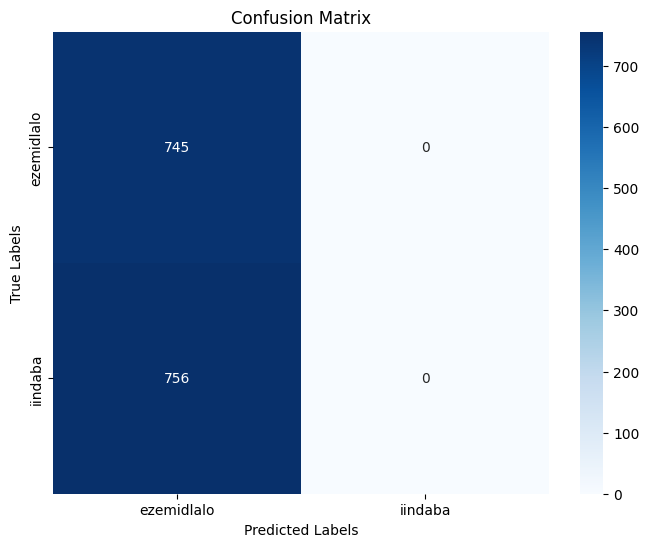

In [17]:
tokenizer = AutoTokenizer.from_pretrained('FacebookAI/xlm-roberta-base')
base_model_classifier = AutoModelForSequenceClassification.from_pretrained('FacebookAI/xlm-roberta-base')

# Load the test dataset
test_dataset = load_dataset('csv', data_files={'test': 'test_data.csv'})['test']

# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(['iindaba', 'ezemidlalo'])  # Modify labels according to your dataset

def encode_labels(examples):
    examples['labels'] = label_encoder.transform(examples['label'])
    return examples

# Apply label encoding to the test dataset
test_dataset = test_dataset.map(encode_labels, batched=True)

# Tokenize the test dataset
def tokenize_classification(examples):
    return tokenizer(
        examples['headlines'],
        padding="max_length",
        truncation=True,
        max_length=512
    )

tokenized_test_dataset = test_dataset.map(
    tokenize_classification,
    batched=True,
    remove_columns=['headlines', 'label']  # Remove original columns
)

# Initialize Trainer
trainer_classifier = Trainer(
    model=base_model_classifier,
)

# Make predictions on the tokenized test dataset
predictions = trainer_classifier.predict(tokenized_test_dataset)

# Extract logits and predicted class labels
logits = predictions.predictions
predicted_label_ids = np.argmax(logits, axis=-1)

# True labels (after tokenization)
true_labels = tokenized_test_dataset['labels']

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_label_ids)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
